# BeamNGpy Feature Overview
*BeamNG.tech only*

## Introduction
This notebook is a non-exhaustive showcase of the things you can do with BeamNGpy, focused on customization of the vehicles, the environment and the sensor suite.

To install BeamNGpy, follow the instructions listed [here](https://github.com/BeamNG/BeamNGpy#installation).
Also be sure to study the complete documentation of [BeamNGpy](https://beamngpy.readthedocs.io) and [BeamNG.tech](https://documentation.beamng.com/beamng_tech/), if you want to familiarize yourself more with the library.

Let's start!

BeamNGpy is packaged as a Python module called `beamngpy`. All the imports that we will need in this notebook are listed in the following cell:

In [1]:
import colorsys
import time

import matplotlib.pyplot as plt
import numpy as np
from beamngpy import BeamNGpy, Scenario, Vehicle
from beamngpy.sensors import (
    IMU, Camera, Damage, Electrics, Lidar, State, Timer, Ultrasonic)
from IPython.display import clear_output

To start BeamNG.tech using BeamNGpy, you use the constructor of the class `BeamNGpy`. The `BeamNGpy` instance allows you to control the simulation. We call `BeamNGpy.open()` to start the simulation which is connected to the Python process using a TCP socket.

#### Documentation

In [2]:
?BeamNGpy

Init signature: BeamNGpy(host, port, home=None, user=None, remote=False)
Docstring:     
The BeamNGpy class is the backbone of communication with the BeamNG
simulation and offers methods of starting, stopping, connecting to, and
controlling the state of the simulator.
Init docstring:
Instantiates a BeamNGpy instance connecting to the simulator on the
given host and port. The home directory of the simulator can be passed
to this constructor. If None is given, this class tries to read a
home path from the ``BNG_HOME`` environment variable.

Note:
    If no home path is set, this class will not work properly.

Args:
    host (str): The host to connect to
    port (int): The port to connect to
    home (str): Path to the simulator's home directory.
    user (str): Additional optional user path to set. This path can be
                used to set where custom files created during
                executions will be placed if the home folder shall not
                be touched.
    remote (b

In [3]:
?BeamNGpy.open

Signature: BeamNGpy.open(self, extensions=None, *args, launch=True, **opts)
Docstring:
Starts a BeamNG.* process, opens a server socket, and waits for the spawned BeamNG.* process to connect.
This method blocks until the process started and is ready.

Args:
    launch (bool): Whether to launch a new process or connect to a running one on the configured host/port. Defaults to True.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


#### Code

In [4]:
beamng = BeamNGpy('localhost', 64256)
beamng.open()

The main menu of BeamNG.tech pops up and we are ready to set up the simulation! We will start on the `italy` map. Let's generate a `Scenario` object, a single `Vehicle` and add the vehicle to the scenario.

#### Documentation

In [5]:
?Scenario

Init signature: Scenario(level, name, path=None, **options)
Docstring:     
The scenario class contains information for setting up and executing
simulation scenarios along with methods to extract data during their
execution.
Init docstring:
Instantiates a scenario instance with the given name taking place in
the given level.

Args:
    level: Either the name of the level this scenario takes place in
           as a string or as an instance of :class:`.Level`
    name (str): The name of this scenario. Should be unique for the
                level it's taking place in to avoid file collisions.
File:           c:\dev\beamngpy\src\beamngpy\scenario.py
Type:           type
Subclasses:     


In [6]:
?Vehicle

Init signature: Vehicle(vid, model, port=None, **options)
Docstring:     
The vehicle class represents a vehicle of the simulation that can be
interacted with from BeamNGpy. This class offers methods to both control
the vehicle's state as well as retrieve information about it through
sensors the user can attach to the vehicle.
Init docstring:
Creates a vehicle with the given vehicle ID. The ID must be unique
within the scenario.

Args:
    vid (str): The vehicle's ID.
    model (str): Model of the vehicle.
File:           c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:           type
Subclasses:     


In [7]:
?Scenario.add_vehicle

Signature:
Scenario.add_vehicle(
    self,
    vehicle,
    pos=(0, 0, 0),
    rot_quat=(0, 0, 0, 1),
    cling=True,
)
Docstring:
Adds a vehicle to this scenario at the given position with the given
orientation.

Args:
    pos (tuple): (x,y,z) tuple specifying the position of the vehicle.
    rot_quat (tuple, optional): (x, y, z, w) tuple specifying
                                the rotation as quaternion
File:      c:\dev\beamngpy\src\beamngpy\scenario.py
Type:      function


In [8]:
?Scenario.make

Signature: Scenario.make(self, bng)
Docstring:
Generates necessary files to describe the scenario in the simulation
and outputs them to the simulator.

Args:
    bng (:class:`.BeamNGpy`): The BeamNGpy instance to generate the
                              scenario for.

Raises:
    BNGError: If the scenario already has set its info .json file included.
File:      c:\dev\beamngpy\src\beamngpy\scenario.py
Type:      function


#### Code

In [9]:
scenario = Scenario('italy', 'beamngpy_feature_overview')

ego = Vehicle('ego', model='etk800', color='White', licence='PYTHON')
scenario.add_vehicle(ego, pos=(245.11, -906.94, 247.46),
                     rot_quat=(0.0010, 0.1242, 0.9884, -0.0872))
scenario.make(beamng)

Voilà, simple as that! To actually start the simulation, you need the following commands:

#### Documentation

In [10]:
?BeamNGpy.load_scenario

Signature: BeamNGpy.load_scenario(self, scenario)
Docstring:
Loads the given scenario in the simulation and returns once loading
is finished.

Args:
    scenario (:class:`.Scenario`): The scenario to load.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [11]:
?BeamNGpy.start_scenario

Signature: BeamNGpy.start_scenario(self, restrict_actions=False)
Docstring:
Starts the scenario; equivalent to clicking the "Start" button in the
game after loading a scenario. This method blocks until the countdown
to the scenario's start has finished.

Args:
    restrict_actions (bool): Whether to keep scenario restrictions,
                             such as limited menu options and controls.
                             Defaults to False.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


#### Code

In [12]:
beamng.load_scenario(scenario)
beamng.start_scenario()

The scenario is now loaded and started. Get ready for the feature showcase! We start by using the `ai_set_mode` command on the vehicle. It will drive around through the whole map, using the road network data to navigate.

#### Documentation

In [13]:
?Vehicle.ai_set_mode

Signature: Vehicle.ai_set_mode(self, mode)
Docstring:
Sets the desired mode of the simulator's built-in AI for this vehicle.
Possible values are:

 * ``disabled``: Turn the AI off (default state)
 * ``random``: Drive from random points to random points on the map
 * ``span``: Drive along the entire road network of the map
 * ``manual``: Drive to a specific waypoint, target set separately
 * ``chase``: Chase a target vehicle, target set separately
 * ``flee``: Flee from a vehicle, target set separately
 * ``stopping``: Make the vehicle come to a halt (AI disables itself
                                                    once the vehicle
                                                    stopped.)

Note:
    Some AI methods automatically set appropriate modes, meaning a call
    to this method might be optional.

Args:
    mode (str): The AI mode to set.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


In [14]:
?Vehicle.ai_drive_in_lane

Signature: Vehicle.ai_drive_in_lane(self, lane)
Docstring:
Sets the drive in lane flag of the AI. If True, the AI only drives
within the lane it can legally drive in.

Args:
    lane (bool): Lane flag to set.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


#### Code

In [15]:
ego.ai_set_mode('span')
ego.ai_drive_in_lane(True)

## Customization options

With BeamNGpy, we can set and tweak various parameters of the vehicles spawned and also of the whole simulation environment. Let's see a few examples of what is possible to do. This list is not exhaustive; consult the [documentation](https://beamngpy.readthedocs.io) to see all the available options.

#### Documentation

In [16]:
?Vehicle.set_color

Signature: Vehicle.set_color(self, rgba=(1.0, 1.0, 1.0, 1.0))
Docstring:
Sets the color of this vehicle. Colour can be adjusted on the RGB
spectrum and the "shininess" of the paint.

Args:
    rgba (tuple): The new colour given as a tuple of RGBA floats, where
                  the alpha channel encodes the shininess of the paint.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


In [17]:
?Vehicle.set_lights

Signature: Vehicle.set_lights(self, **kwargs)
Docstring:
Sets the vehicle's lights to given intensity values. The lighting
system features lights that are simply binary on/off, but also ones
where the intensity can be varied. Binary lights include:

    * `left_signal`
    * `right_signal`
    * `hazard_signal`

Non-binary lights vary between 0 for off, 1 for on, 2 for higher
intensity. For example, headlights can be turned on with 1 and set to
be more intense with 2. Non-binary lights include:

    * `headlights`
    * `fog_lights`
    * `lightbar`

Args:
    left_signal (bool): On/off state of the left signal
    right_signal (bool): On/off state of the right signal
    hazard_signal (bool): On/off state of the hazard lights
    headlights (int): Value from 0 to 2 indicating headlight intensity
    fog_lights (int): Value from 0 to 2 indicating fog light intensity
    lightbar (int): Value from 0 to 2 indicating lightbar intensity

Note:
    Not every vehicle has every type of light.

In [18]:
?BeamNGpy.set_tod

Signature: BeamNGpy.set_tod(self, tod)
Docstring:
Sets the current time of day. The time of day value is given as a float
between 0 and 1. How this value affects the lighting of the scene is
dependant on the map's TimeOfDay object.

Args:
    tod (float): Time of day beteen 0 and 1.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [19]:
?BeamNGpy.pause

Signature: BeamNGpy.pause(self)
Docstring:
Sends a pause request to BeamNG.*, blocking until the simulation is
paused.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [20]:
?BeamNGpy.resume

Signature: BeamNGpy.resume(self)
Docstring:
Sends a resume request to BeamNG.*, blocking until the simulation
is resumed.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [21]:
?BeamNGpy.set_gravity

Signature: BeamNGpy.set_gravity(self, gravity=-9.807)
Docstring:
Sets the strength of gravity in the simulator.

Args:
    gravity (float): The gravity value to set. The default one is
                     that of earth (-9.807)
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [22]:
?BeamNGpy.display_gui_message

Signature: BeamNGpy.display_gui_message(self, msg)
Docstring:
Displays a toast message in the user interface of the simulator.

Args:
    msg (str): The message to display.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


### Change color

Cycles through 30 different colors and applies them to the vehicle in sequence.

In [23]:
def generate_colors(n):
    hue = 0.0
    step_val = 1.0 / n
    for _ in range(n):
        rgb = colorsys.hsv_to_rgb(hue, 1, 1)
        hue += step_val
        hue %= 1.0
        yield (*rgb, 1.0)

for color in generate_colors(30):
    ego.set_color(color)
    time.sleep(0.1)
ego.set_color((1.0, 0.5, 0.5, 1.0))

### Switch lights

Switches all lights on and then resets them to the original state.

In [24]:
ego.set_lights(left_signal=True, right_signal=True, hazard_signal=True,
               headlights=2, fog_lights=2, lightbar=2)

In [25]:
ego.set_lights(left_signal=False, right_signal=False, hazard_signal=False,
               headlights=1, fog_lights=0, lightbar=0)

### Set time of day

In [26]:
for t in range(100):
    beamng.set_tod(t / 100)
    time.sleep(0.1)

### Pause/resume simulation

In [27]:
beamng.pause()

In [28]:
beamng.resume()

### Set gravity

In [29]:
beamng.set_gravity(0)
beamng.display_gui_message('Space adventures await!')

In [30]:
beamng.set_gravity(-50)

OK, that was too much gravity for the car. Let's reset it back. We also use the `teleport_vehicle` function, which resets the vehicle's physics state (repairs it) as a side effect.

### Teleport vehicle

#### Documentation

In [31]:
?Scenario.find_waypoints

Signature: Scenario.find_waypoints(self)
Docstring:
Finds waypoints placed in the world right now.

Returns:
    A list of :class:`.ScenarioObject` containing waypoints found in
    the world.

Raises:
    BNGError: If the scenario is not currently loaded.
File:      c:\dev\beamngpy\src\beamngpy\scenario.py
Type:      function


In [32]:
?Vehicle.teleport

Signature: Vehicle.teleport(self, pos, rot_quat=None, reset=True)
Docstring:
Teleports the vehicle to the given position with the given
rotation.

Args:
    pos (tuple): The target position as an (x,y,z) tuple containing
                 world-space coordinates.
    rot_quat (tuple): Optional tuple (x, y, z, w) specifying vehicle
                      rotation as quaternion
    reset (bool): Specifies if the vehicle will be reset to its initial
                  state during teleport (including its velocity).

Notes:
    The ``reset=False`` option is incompatible with setting rotation of
    the vehicle. With the current implementation, it is not possible to
    set the rotation of the vehicle and to keep its velocity during teleport.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


In [33]:
?Vehicle.set_shift_mode

Signature: Vehicle.set_shift_mode(self, mode)
Docstring:
Sets the shifting mode of the vehicle. This changes whether or not and
how the vehicle shifts gears depending on the RPM. Available modes are:

 * ``realistic_manual``: Gears have to be shifted manually by the
                         user, including engaging the clutch.
 * ``realistic_manual_auto_clutch``: Gears have to be shifted manually
                                     by the user, without having to
                                     use the clutch.
 * ``arcade``: Gears shift up and down automatically. If the brake is
               held, the vehicle automatically shifts into reverse
               and accelerates backward until brake is released or
               throttle is engaged.
 * ``realistic_automatic``: Gears shift up automatically, but reverse
                            and parking need to be shifted to
                            manually.

Args:
    mode (str): The mode to set. Must be a string from the opt

In [34]:
?Vehicle.control

Signature: Vehicle.control(self, **options)
Docstring:
Sends a control message to the vehicle, setting vehicle inputs
accordingly. Possible values to set are:

 * ``steering``: Rotation of the steering wheel, from -1.0 to 1.0.
 * ``throttle``: Intensity of the throttle, from 0.0 to 1.0.
 * ``brake``: Intensity of the brake, from 0.0 to 1.0.
 * ``parkingbrake``: Intensity of the parkingbrake, from 0.0 to 1.0.
 * ``clutch``: Clutch level, from 0.0 to 1.0.
 * ``gear``: Gear to shift to, -1 eq backwards, 0 eq neutral, 1 to X eq nth gear

Args:
    **kwargs (dict): The input values to set.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


In [35]:
?Vehicle.set_velocity

Signature: Vehicle.set_velocity(self, velocity, dt=1.0)
Docstring:
Sets the velocity of this vehicle. The velocity is not achieved instantly,
it is acquired gradually over the time interval set by the `dt` argument.

As the method of setting velocity uses physical forces, at high velocities
it is important to set `dt` to an appropriately high value. The default
`dt` value of 1.0 is suitable for velocities up to 30 m/s.

Args:
    velocity (float): The target velocity in m/s.
    dt (float): The time interval over which the vehicle reaches the
                target velocity. Defaults to 1.0.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


#### Code

In [36]:
# reset gravity, disable AI
beamng.set_gravity()
ego.ai_set_mode('disabled')

In [37]:
waypoints = {w.name: w for w in scenario.find_waypoints()} # get a list of locations from the simulation

ego.teleport(waypoints['city_east_bridge1_b'].pos, rot_quat=(0.0011, 0.0315, 0.9995, -0.0096))

True

If we need to teleport a moving vehicle to some position and keep it moving, we set the `reset` argument of `Vehicle.teleport` to `False`.

In [38]:
# get the vehicle moving
ego.set_shift_mode('arcade')
ego.control(gear=1, throttle=0.1)
ego.set_velocity(10)

# wait some time
time.sleep(2.0)

# teleport the vehicle and enable AI again
ego.teleport((244.87, -926.57, 251.89), reset=False)
ego.ai_set_mode('span')
ego.ai_drive_in_lane(True)

## Traffic

To enable traffic, we first spawn a set of vehicles that will be in the traffic pool, and then use the `start_traffic` function. With the traffic, we are no longer alone in this simulation!

#### Documentation

In [39]:
?BeamNGpy.get_available_vehicles

Signature: BeamNGpy.get_available_vehicles(self)
Docstring:
Retrieves a dictionary of vehicles known to the simulator that map
to various properties of the vehicle and a list of pre-configured
vehicle configurations.

Returns:
    A mapping of model names to vehicle properties & configs.

Raises:
    BNGError: If the game is not running to accept a request.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [40]:
?BeamNGpy.start_traffic

Signature: BeamNGpy.start_traffic(self, participants)
Docstring:
Enables traffic simulation for the given list of vehicles.

Args:
    participants (list): List of vehicles that will be part of the
                         simulation. These vehicles need to be spawned
                         beforehand and the simulation will take
                         control of them.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


In [41]:
?BeamNGpy.switch_vehicle

Signature: BeamNGpy.switch_vehicle(self, vehicle)
Docstring:
Switches to the given :class:`.Vehicle`. This means that the
simulator's main camera, inputs by the user, and so on will all focus
on that vehicle from now on.

Args:
    vehicle (:class:`.Vehicle`): The target vehicle.
File:      c:\dev\beamngpy\src\beamngpy\beamng.py
Type:      function


#### Code

In [43]:
traffic_vehicles = [
    Vehicle('traffic1', model='miramar'),
    Vehicle('traffic2', model='moonhawk'),
    Vehicle('traffic3', model='sbr'),
    Vehicle('traffic4', model='etki'),
]
for vehicle in traffic_vehicles:
    scenario.add_vehicle(vehicle, (244.87, -926.57, 251.89), rot_quat=(0, 0, 0, 1))
    
beamng.start_traffic(traffic_vehicles)
ego.teleport((-692.93, -1341.58, 140.60), rot_quat=(0.0000, 0.0000, 0.6757, 0.7372))
beamng.switch_vehicle(ego)

## Sensors

Vehicles can be provided with sensors, which capture the simulation and vehicle state data.
There are currently two classes of sensor, which have slightly different APIs.

The first class of sensors are our `Automated Sensors`. These sensors are created with parameters to allow them to update automatically in the simulator at a given time, and with a given priority.  This management is needed when we wish to run the simulation with many sensors.  These sensors (with the exception of the accelerometer) can be attached to fixed points on the map, as well as to positions on or relative to vehicles.
These sensors can also be set to not update automatically, if desired.  We can poll these sensors in two ways: i) by getting the latest readings which were polled at the set update time for the sensor, or ii) by sending ad-hoc requests for data, which can be used if we only want occasional reading on-the-fly.
- Camera (providing colour images, class annotation images, semantic annotation images, and depth images)
- LiDAR (providing point cloud and/or annotation colour data)
- Ultrasonic Sensor (eg can be used as a parking sensor)
- Accelerometer (a tri-axial accelerometer, providing a vehicles acceleration in a local coordinate system)

The second class of sensors are not automated currently, and use the older API.  These are polled in an ad-hoc fashion.
- IMU (Inertial Measurement Unit)
- Electrics
- Vehicle state

Let's see how we can use these sensors in BeamNGpy. We respawn our vehicle with multiple sensors and get data from them.

#### Documentation

In [44]:
?Vehicle.attach_sensor

Signature: Vehicle.attach_sensor(self, name, sensor)
Docstring:
Enters a sensor into this vehicle's map of known sensors and calls the
attach-hook of said sensor. The sensor is identified using the given
name, which has to be unique among the other sensors of the vehicle.

Args:
    name (str): The name of the sensor.
    sensor (:class:`beamngpy.Sensor`): The sensor to attach to the vehicle.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


In [45]:
?Vehicle.poll_sensors

Signature: Vehicle.poll_sensors(self)
Docstring:
Updates the vehicle's sensor readings.

Args:
    requests (None): This function parameter is not used and will be
                     removed in future versions.

Returns:
    Dict with sensor data to support compatibility with
    previous versions.
    Use `vehicle.sensors[<sensor_id>].data[<data_access_id>]` to
    access the polled sensor data.
File:      c:\dev\beamngpy\src\beamngpy\vehicle.py
Type:      function


#### Code

### Camera sensor

Camera sensor provides visual information about the environment. Colour camera provides the same visuals as the simulation. Annotation camera provides object annotations - every object class is annotated with a different color. Instance camera provides instance annotation - every object instance is annotated with a different color. And the depth camera provides depth information of the environment.

#### Documentation

In [46]:
?Camera

Init signature:
Camera(
    name,
    bng,
    vehicle=None,
    requested_update_time=0.1,
    update_priority=0.0,
    pos=(0, 0, 3),
    dir=(0, -1, 0),
    up=(0, 0, 1),
    resolution=(512, 512),
    field_of_view_y=70,
    near_far_planes=(0.05, 100.0),
    is_using_shared_memory=True,
    is_render_colours=True,
    is_render_annotations=True,
    is_render_instance=False,
    is_render_depth=True,
    is_depth_inverted=False,
    is_visualised=True,
    is_static=False,
    is_snapping_desired=False,
    is_force_inside_triangle=False,
)
Docstring:      <no docstring>
Init docstring:
Creates a camera sensor.

Args:
    name (str): A unique name for this camera sensor.
    bng (BeamNGpy): The BeamNGpy instance, with which to communicate to the simulation.
    vehicle (Vehicle class): The vehicle to which this sensor should be attached, if any.
    requested_update_time (float): The time which should pass between sensor reading updates, in seconds. This is just a suggestion to th

In [47]:
?Camera.poll

Signature: Camera.poll(self)
Docstring:
Gets the most-recent readings for this sensor.
Note: if this sensor was created with a negative update rate, then there may have been no readings taken.

Returns:
    (dict): The processed images.
File:      c:\dev\beamngpy\src\beamngpy\sensors\camera.py
Type:      function


In [48]:
?Camera.get_full_poll_request

Signature: Camera.get_full_poll_request(self)
Docstring:
Gets a full camera request (semantic annotation and instance annotation data included).
NOTE: this function blocks the simulation until the data request is completed.

Returns:
    (dict): The camera data, as images
File:      c:\dev\beamngpy\src\beamngpy\sensors\camera.py
Type:      function


#### Code

In [49]:
camera = Camera('camera1', beamng, ego, is_render_instance=True)
time.sleep(2)
data = camera.poll()
data

{'type': 'Camera',
 'colour': <PIL.Image.Image image mode=RGBA size=512x512 at 0x27DB3E4E190>,
 'annotation': <PIL.Image.Image image mode=RGBA size=512x512 at 0x27DB66DEEB0>,
 'depth': <PIL.Image.Image image mode=L size=512x512 at 0x27DB66DEBB0>}

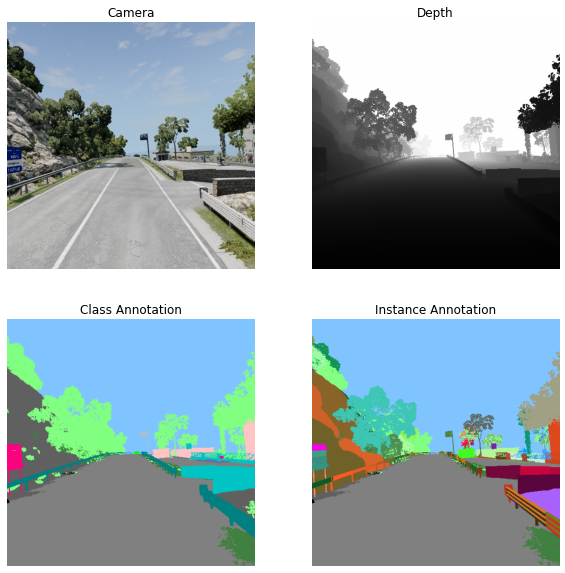

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]
ax[0, 0].title.set_text('Camera')
ax[0, 1].title.set_text('Depth')
ax[1, 0].title.set_text('Class Annotation')
ax[1, 1].title.set_text('Instance Annotation')

for _ in range(10):
    data = camera.get_full_poll_request()
    ax[0, 0].imshow(np.asarray(data['colour'].convert('RGB')))
    ax[0, 1].imshow(np.asarray(data['depth'].convert('RGB')))
    ax[1, 0].imshow(np.asarray(data['annotation'].convert('RGB')))
    ax[1, 1].imshow(np.asarray(data['instance'].convert('RGB')))
    display(fig)
    clear_output(wait=True)
    
camera.remove()

### LiDAR

Another sensor provided by the simulation is LiDAR. The LiDAR sensor provides 3D point clouds representing the environment as detected by a pulsing laser emitted from the vehicle.

#### Documentation

In [51]:
?Lidar

Init signature:
Lidar(
    name,
    bng,
    vehicle=None,
    requested_update_time=0.1,
    update_priority=0.0,
    pos=(0, 0, 1.7),
    dir=(0, -1, 0),
    up=(0, 0, 1),
    vertical_resolution=64,
    vertical_angle=26.9,
    rays_per_second=2200000,
    frequency=20,
    horizontal_angle=360,
    max_distance=120,
    is_using_shared_memory=True,
    is_visualised=True,
    is_annotated=False,
    is_static=False,
    is_snapping_desired=False,
    is_force_inside_triangle=False,
)
Docstring:      <no docstring>
Init docstring:
Creates a LiDAR sensor.

Args:
    name (str): A unique name for this LiDAR sensor.
    bng (BeamNGpy): The BeamNGpy instance, with which to communicate to the simulation.
    vehicle (Vehicle class): The vehicle to which this sensor should be attached, if any.
    requested_update_time (float): The time which should pass between sensor reading updates, in seconds. This is just a suggestion to the manager.
    update_priority (float): The priority which t

In [52]:
?Lidar.poll

Signature: Lidar.poll(self)
Docstring:
Gets the most-recent readings for this sensor.
Note: if this sensor was created with a negative update rate, then there may have been no readings taken.

Returns:
    (np.array x 2): The LiDAR point cloud and colour data.
File:      c:\dev\beamngpy\src\beamngpy\sensors\lidar.py
Type:      function


#### Code

In [53]:
lidar = Lidar('lidar1', beamng, ego)
time.sleep(2)
lidar_data = lidar.poll()
print(lidar_data)

{'type': 'Lidar', 'pointCloud': 1895436.0, 'colours': 631812.0}


In [54]:
lidar.remove()

### Ultrasonic sensor

An ultrasonic sensor measures the distance to a close object using ultrasonic waves and uses the echo-localization principle (for example, a parking sensor).

#### Documentation

In [55]:
?Ultrasonic

Init signature:
Ultrasonic(
    name,
    bng,
    vehicle=None,
    requested_update_time=0.1,
    update_priority=0.0,
    pos=(0, 0, 1.7),
    dir=(0, -1, 0),
    up=(0, 0, 1),
    resolution=(200, 200),
    field_of_view_y=5.7,
    near_far_planes=(0.1, 5.1),
    range_roundess=-1.15,
    range_cutoff_sensitivity=0.0,
    range_shape=0.3,
    range_focus=0.376,
    range_min_cutoff=0.1,
    range_direct_max_cutoff=5.0,
    sensitivity=3.0,
    fixed_window_size=10,
    is_visualised=True,
    is_static=False,
    is_snapping_desired=False,
    is_force_inside_triangle=False,
)
Docstring:      <no docstring>
Init docstring:
Creates an ultrasonic sensor.
Args:
    name (str): A unique name for this ultrasonic sensor.
    bng (BeamNGpy): The BeamNGpy instance, with which to communicate to the simulation.
    vehicle (Vehicle class): The vehicle to which this sensor should be attached, if any.
    requested_update_time (float): The time which should pass between sensor reading updates,

In [56]:
?Ultrasonic.poll

Signature: Ultrasonic.poll(self)
Docstring:
Gets the most-recent readings for this sensor.
Note: if this sensor was created with a negative update rate, then there may have been no readings taken.
Returns:
    (dict): A dictionary containing the distance measurement and the window (min and mix values) in which it was computed.
File:      c:\dev\beamngpy\src\beamngpy\sensors\ultrasonic.py
Type:      function


#### Code

In [57]:
ultrasonic = Ultrasonic('ultrasonic1', beamng, ego)

ego.ai_set_mode('disabled')
ego.teleport(pos=(464.23, 1504.52, 139.23), rot_quat=(0, 0, 0, 1))
ego.set_shift_mode('arcade')
ego.control(gear=1, throttle=0.1)
 
for _ in range(20):
    ultrasonic_data = ultrasonic.poll()
    print('Distance to obstacle:', ultrasonic_data['distance'])
    beamng.step(30)

Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 9999.900390625
Distance to obstacle: 4.824071884155273
Distance to obstacle: 2.1495587825775146
Distance to obstacle: 2.881605863571167
Distance to obstacle: 3.049140214920044
Distance to obstacle: 2.6716511249542236
Distance to obstacle: 2.0549497604370117
Distance to obstacle: 2.5452630519866943
Distance to obstacle: 2.4806883335113525
Distance to obstacle: 2.0367066860198975


In [58]:
ultrasonic.remove()

### Other sensors

These provide differents kinds of measurements of the vehicle and simulation state:
- `State`: position, direction and velocity of the vehicle
- `IMU`: inertial measurement unit, measures forces and rotational acceleration in the vehicle
- `Electrics`: various values provided by the car's electric systems
- `Damage`: provided exact data about damage of the vehicle parts in the simulation
- `Timer`: provides the relative time since the start of the simulation

#### Documentation

In [59]:
?State

Init signature: State()
Docstring:     
The state sensor monitors general stats of the vehicle, such as position,
direction, velocity, etc. It is a default sensor every vehicle has and is
used to update the vehicle.state attribute.
File:           c:\dev\beamngpy\src\beamngpy\sensors\state.py
Type:           ABCMeta
Subclasses:     


In [60]:
?IMU

Init signature: IMU(pos=None, node=None, name=None, debug=False)
Docstring:     
An IMU measures forces and rotational acceleration at a certain point on a
vehicle. This can be used to analyze forces acting on certain areas of the
car (like the driver's position) or estimate the trajectory of a vehicle
from its rotation and acceleration.
File:           c:\dev\beamngpy\src\beamngpy\sensors\imu.py
Type:           ABCMeta
Subclasses:     


In [61]:
?Electrics

Init signature: Electrics()
Docstring:     
This sensor is used to retrieve various values made available by the car's
eletrics systems. These values include:

# TODO: List all the electrics.lua values.
- abs (int): ABS state
- abs_active (bool):
- airspeed (float): Airspeed
- airflowspeed (float):
- altitude (float): Z axis position
- avg_wheel_av (float):
- brake (int): Brake value
- brake_lights (int):
- brake_input (int): Brake input value
- check_engine (bool): Check engine light state.
- clutch (int): Clutch value
- clutch_input (int): Clutch input value
- clutch_ratio (int):
- driveshaft (float): Driveshaft
- engine_load (float):
- engine_throttle (int): Engine throttle state
- esc (int): ESC state. 0 = not present/inactive, 1 = disabled, Blink = active
- esc_active (bool):
- exhaust_flow (float):
- fog_lights (int): Fog light state
- fuel (float): Percentage of fuel remaining.
- fuel_capacity (int): Total Fuel Capacity [L].
- fuel_volume (float):
- gear (int):
- gear_a (int): G

In [62]:
?Damage

Init signature: Damage()
Docstring:     
The damage sensor retrieves information about how damaged the structure
of the vehicle is. It's important to realise that this is a sensor that has
no analogue in real life as it returns a perfect knowledge overview of how
deformed the vehicle is. It's therefore more of a ground truth than
simulated sensor data.
File:           c:\dev\beamngpy\src\beamngpy\sensors\damage.py
Type:           ABCMeta
Subclasses:     


In [63]:
?Timer

Init signature: Timer()
Docstring:     
The timer sensor keeps track of the time that has passed since the
simulation started. It provides that information in seconds relative to the
scenario start and does not represent something like a day time or date. It
properly handles pausing the simulation, meaning the value of the timer
sensor does not progress while the simulation is paused.

When polled, this sensor provides the time in seconds since the start of
the scenario in a dictionary under the 'time' key.
File:           c:\dev\beamngpy\src\beamngpy\sensors\timer.py
Type:           ABCMeta
Subclasses:     


In [64]:
?Scenario.remove_vehicle

Signature: Scenario.remove_vehicle(self, vehicle)
Docstring:
Removes the given :class:`.Vehicle`: from this scenario. If the
scenario is currently loaded, the vehicle will be despawned.

Args:
    vehicle (:class:`.Vehicle`): The vehicle to remove.
File:      c:\dev\beamngpy\src\beamngpy\scenario.py
Type:      function


#### Code

In [65]:
scenario.remove_vehicle(ego)
ego = Vehicle('ego', model='etk800', color='White', licence='PYTHON')
imu = IMU(pos=(0.73, 0.51, 0.8), debug=True)
electrics = Electrics()
damage = Damage()
timer = Timer()

ego.attach_sensor('imu', imu)
ego.attach_sensor('electrics', electrics)
ego.attach_sensor('damage', damage)
ego.attach_sensor('timer', timer)

scenario.add_vehicle(ego, pos=(-692.93, -1341.58, 140.60),
                     rot_quat=(0.0000, 0.0000, 0.6757, 0.7372))
ego.control(gear=1)
ego.ai_set_mode('span')
ego.ai_drive_in_lane(True)

In [66]:
ego.poll_sensors()

#### State

In [67]:
ego.sensors['state'].data

{'pos': [-691.4453282728791, -1340.5384974107146, 140.5069410536671],
 'up': [0.006419870536774397, -0.01988053508102894, 0.9997817873954773],
 'front': [-690.2445068359375, -1339.5726318359375, 141.10891723632812],
 'vel': [2.2349398136138916, 2.326737403869629, -0.017957914620637894],
 'rotation': [-0.008063076063990593,
  0.006858454085886478,
  -0.8521988987922668,
  0.5231109857559204],
 'dir': [0.8917096257209778, 0.4525962769985199, 0.003253309754654765]}

#### IMU

In [68]:
ego.sensors['imu'].data

{'aZ': 2.556485540632506e-15,
 'gX': 8.066379388018952,
 'gY': -2.9706048512180727,
 'gZ': 25.244193658976315,
 'name': '171194409123',
 'aX': -0.6458464286573854,
 'aY': 0.1412284257059817}

#### Electrics

In [69]:
ego.sensors['electrics'].data

{'dseColor': '238BE6',
 'steering_input': -0.9364333406592332,
 'wheelThermals': {'FR': {'brakeSurfaceTemperature': 25.936700439453148,
   'brakeThermalEfficiency': 0.9309739146484789,
   'brakeCoreTemperature': 25.93672696187278},
  'FL': {'brakeSurfaceTemperature': 25.936700439453148,
   'brakeThermalEfficiency': 0.9309739146484789,
   'brakeCoreTemperature': 25.936726963317508},
  'RR': {'brakeSurfaceTemperature': 25.936700439453148,
   'brakeThermalEfficiency': 0.9309739146484789,
   'brakeCoreTemperature': 25.936724448683492},
  'RL': {'brakeSurfaceTemperature': 25.945661045089516,
   'brakeThermalEfficiency': 0.9309859964463919,
   'brakeCoreTemperature': 25.93824858911023}},
 'isYCBrakeActive': 0.0,
 'isTCBrakeActive': 0.0,
 'smoothShiftLogicAV': 27.456162198069308,
 'rpmspin': 9.47327272657077,
 'boost': 0.0,
 'boostMax': 0.0,
 'idlerpm': 650.0,
 'lights': 0.0,
 'turnsignal': 0.0,
 'altitude': 140.50839192301987,
 'freezeState': False,
 'nop': 0.0,
 'maxGearIndex': 6.0,
 'abs':

#### Damage

In [70]:
ego.sensors['damage'].data

{'part_damage': [],
 'lowpressure': False,
 'type': 'Damage',
 'damage': 0.0,
 'damage_ext': 0.0,
 'deform_group_damage': {'mainEngine': {'eventCount': 0.0,
   'maxEvents': 2800.0,
   'damage': 0.0,
   'invMaxEvents': 0.00035714285714285714},
  'radiator_damage': {'eventCount': 0.0,
   'maxEvents': 399.99999999999994,
   'damage': 0.0,
   'invMaxEvents': 0.0025000000000000005},
  'doorglass_RL_break': {'eventCount': 0.0,
   'maxEvents': 639.9999999999999,
   'damage': 0.0,
   'invMaxEvents': 0.0015625000000000003},
  'sideglass_R_break': {'eventCount': 0.0,
   'maxEvents': 666.6666666666666,
   'damage': 0.0,
   'invMaxEvents': 0.0015},
  'doorglass_FL_break': {'eventCount': 0.0,
   'maxEvents': 659.9999999999999,
   'damage': 0.0,
   'invMaxEvents': 0.0015151515151515154},
  'radtube_break': {'eventCount': 0.0,
   'maxEvents': 499.99999999999994,
   'damage': 0.0,
   'invMaxEvents': 0.002},
  'taillightglass_R_break': {'eventCount': 0.0,
   'maxEvents': 539.9999999999999,
   'damage':

#### Timer

In [71]:
ego.sensors['timer'].data

{'time': 143.4667521379888}

### Where next

And this is the end of the quick overview of BeamNGpy features! If you want to see more examples, please follow the [example guide](https://github.com/BeamNG/BeamNGpy/blob/dev/examples/guide.md).